**Obrada informacija**: Prva laboratorijska vježba

Rijeke imaju veliki gospodarski značaj, od termoelektrana i nuklearnih elektrana kojima su rijeke nužne za rad, javne vodoopskrbe do poljoprivrede i transporta. Premda ljudi danas uvelike upravljaju vodotocima, uslijed vremenskih prilika ipak može doći do poplava, erozija tla i sličnih prirodnih nepogoda. Kako bismo se mogli na vrijeme pripremiti za potencijalne probleme, potrebno je istražiti ponašanje rijeka na temelju višegodišnjih praćenja vodostaja. U ovoj laboratorijskoj vježbi ćete analizirati vodostaje rijeke Save kroz period od 25 godina.

Unutar komprimiranog direktorija u kojem se nalazi ova bilježnica, nalazi se i .mat datoteka s podacima o vodostaju rijeke Save u periodu od 1.1.1982. do 31.12.2007. Svaki podatak označava jedan dan mjerenja vodostaja. 

Vježba se izvodi u Pythonu/Google Colabu, a sve naredbe potrebne za provedbu vježbe te njihova objašnjenja dana su u predavanju. Ova laboratorijska vježba nosi 3 boda. 

Kad ste gotovi s vježbom, na *Moodle* postavite .pdf izvješće s vježbe (.pdf izvješće možete generirati s naredbom File-Print-Location: PDF). 

**1.**	Učitajte biblioteke: NumPy, matplotlib.pyplot, scipy.fft, signal iz scipy te pywt.

In [5]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft            # Učitavanje FFT (Fast Fourier Transform) iz SciPy za analizu frekvencija
from scipy import signal          # Učitavanje modula signal iz SciPy za obradu signala
import pywt                       # Učitavanje PyWavelets za rad s valnim transformacijama


**2.**	Učitajte podatke o vodostaju iz .mat datoteke koja se nalazi unutar istog komprimiranog direktorija. Učitani podaci su spremljeni u rječnik. Izdvojite ključ i pripadne podatke o vodostajima te po potrebi smanjite dimenziju.

Savjet: .mat datoteku učitajte sa svog Google Drivea (unutar mape Colab Notebooks na svom Google Driveu postavite .mat datoteku). Ostali savjeti nalaze se u sljedećem programskom odsječku. 

In [6]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

from scipy import io
data_dict = io.loadmat("3_OIkobas")
kobas_iz_matlaba = data_dict["kobas"]
kobas_iz_matlaba = np.squeeze(kobas_iz_matlaba)

print(kobas_iz_matlaba)

[661 674 685 ... 242 230 228]


**3.**	Ispišite: broj dana za koje postoje podaci o vodostajima, srednju vrijednost vodostaja, standardnu devijaciju, minimalnu vrijednost, maksimalnu vrijednost te median.

In [7]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
print(f"broj dana za koje postoje podaci o vodostajima: {kobas_iz_matlaba.size}")
print(f"srednja vrijednost vodostaja: {round(np.mean(kobas_iz_matlaba), 2)}")
print(f"standardna devijacija: {round(np.std(kobas_iz_matlaba, axis=0),2)}")
print(f"minimalna vrijednost: {round(np.min(kobas_iz_matlaba), 2)}")
print(f"maksimalna vrijednost: {round(np.max(kobas_iz_matlaba), 2)}")
print(f"median: {round(np.median(kobas_iz_matlaba), 0)}")


broj dana za koje postoje podaci o vodostajima: 9496
srednja vrijednost vodostaja: 294.26
standardna devijacija: 183.09
minimalna vrijednost: 17
maksimalna vrijednost: 878
median: 255.0


**4.** Nacrtajte vodostaj. Obilježite x i y os te naslov slike. 

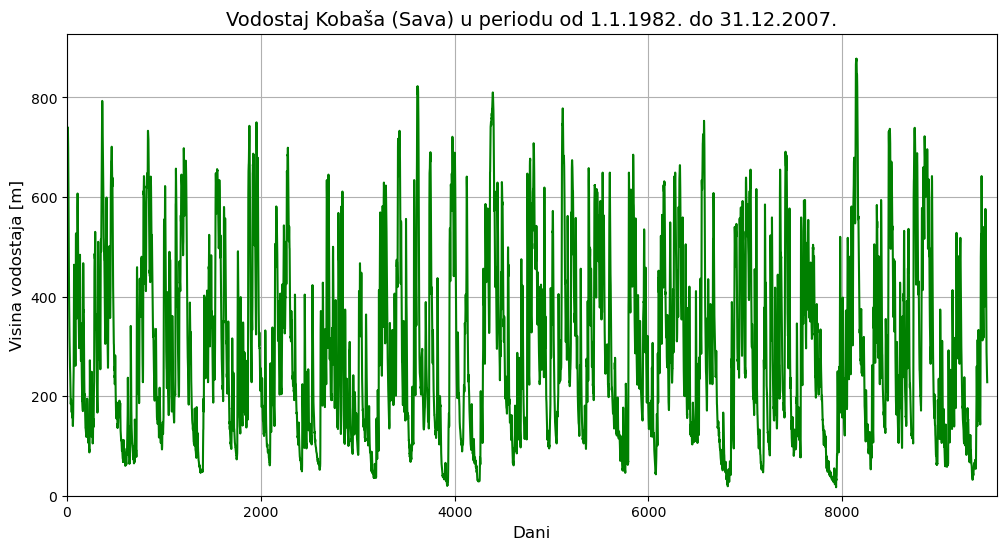

In [8]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.

plt.figure(figsize=(12, 6))  # Postavljanje veličine figure

# Nacrtaj graf
plt.plot(np.arange(1, kobas_iz_matlaba.size + 1, 1), kobas_iz_matlaba, c="green", linewidth=1.5)

# Dodaj naslove i oznake
plt.title("Vodostaj Kobaša (Sava) u periodu od 1.1.1982. do 31.12.2007.", fontsize=14)
plt.xlabel('Dani', fontsize=12)
plt.ylabel('Visina vodostaja [m]', fontsize=12)

# Postavi granice osi
plt.xlim(0, kobas_iz_matlaba.size + 100)  # Malo proširi x os
plt.ylim(0, np.max(kobas_iz_matlaba) + 50)  # Proširi y os na osnovu maksimalne vrijednosti

# Dodaj mrežu
plt.grid(True)

# Pokaži graf
plt.show()


**5.**	Izračunajte diskretnu Fourierovu transformaciju zadanog vodostaja. Ispišite dobivene vrijednosti. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata.

[2794270.            -0.j           -9312.52756202+49784.33987081j
   80617.82235263-75905.53826228j ...  -75144.8689581 -18406.78122837j
   80617.82235263+75905.53826228j   -9312.52756202-49784.33987081j]


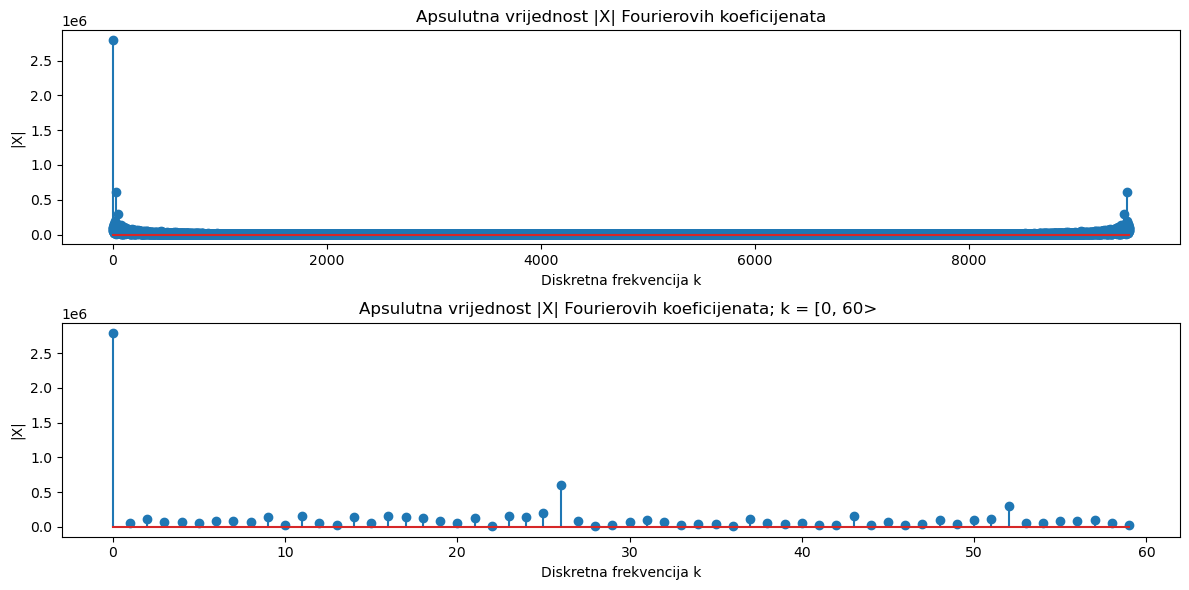

In [31]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
X = fft(kobas_iz_matlaba, kobas_iz_matlaba.size)            # DFT u kobas_iz_matlaba.size tocaka; fast furierova transformacija znaci samo da je algoritam za izracun transformacije optimiziran
print(X)

# Magnituda (apsolutne vrijednosti)
abs_X = np.abs(X)

# Faza (kut u radijanima)
# faza_X = np.angle(X)

# Postavi grafiku
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Graf magnituda (peteljkasti prikaz)
ax1.set_title('Apsulutna vrijednost |X| Fourierovih koeficijenata')
ax1.stem(np.arange(0, len(abs_X)), abs_X)
ax1.set_xlabel('Diskretna frekvencija k')
ax1.set_ylabel('|X|')

# Graf magnituda ali zumiran na prvih [ogranicenje] vrijendosti
ogranicenje = 60
ax2.set_title(f'Apsulutna vrijednost |X| Fourierovih koeficijenata; k = [0, {ogranicenje}> ')
ax2.stem(np.arange(0, ogranicenje), abs_X[:ogranicenje])
ax2.set_xlabel('Diskretna frekvencija k')
ax2.set_ylabel('|X|')

# Graf faza nema smisla crtat, jer su faze jako izražene i graf je nepregledan
# Graf faza (peteljkasti prikaz)
# ax2.set_title('Faza ∠X Fourierovih koeficijenata')
# ax2.stem(np.arange(0, len(faza_X)), faza_X)
# ax2.set_xlabel('Diskretna frekvencija')
# ax2.set_ylabel('Faza ∠X (radijani)')##

# Prikaz grafova
plt.tight_layout()
plt.show()

**6.**	Izračunajte Fourierovu transformaciju na vremenskom otvoru zadanog vodostaja koristeći pravokutni otvor širine 2 godine. Prikažite rezultat pomoću pcolormesh. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

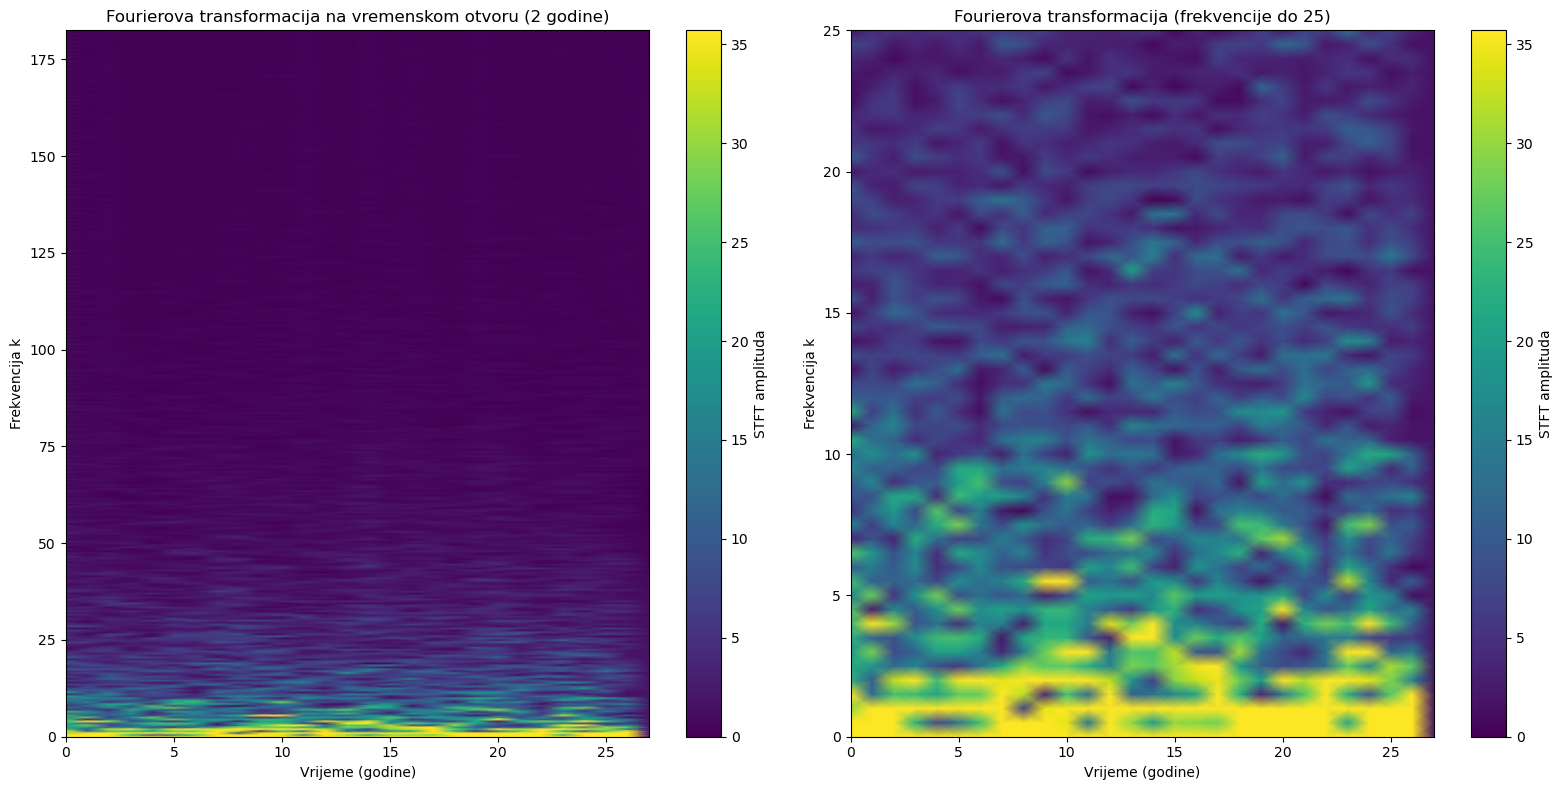

In [46]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.

# Postavi grafiku
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fs = 365  # uzorkovanje 365 puta godišnje, tj gledamo koliko ima mjerenja unutar 1 godine, zapravo predstavlja frekvenciju uzrokovanja, 365 puta godisnje, period bi bio 1/365
T = 2  # Širina prozora 2 godine
window = 'boxcar'  # Pravokutni prozor (boxcar prozor)
nperseg = T * fs  # Broj uzoraka po segmentu je duljina prozora (2 godine)

# Izračunaj STFT, short time fourierovu transformaciju
f, t, Zxx = signal.stft(kobas_iz_matlaba, fs=fs, window=window, nperseg=nperseg)
# f - niz frekvencija koje se analiziraju
# t - niz vremesnkih trenutaka kada je prozor STFT primijenjen, ti trenuci odgovaraju različitim segmentima signala koji se analizira
# Zxx - 2D polje: stupac predsatvlja razlicite vremenske segmente (dane u polju t), redak predstavlja različite frekvencije (koje su dane u polju f)
#     - vrijednosti predstavljaju Kompleksne frekvencisjki koeficijent X(t,f) koji sadrži informaciju o amplitudi i fazi svake frekvencije u svakom vremenskom segmentu.

# Prvi graf - puni raspon frekvencija
mappable1 = ax1.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx).max()/10, shading='gouraud')
fig.colorbar(mappable1, ax=ax1, label='STFT amplituda')
ax1.set_title('Fourierova transformacija na vremenskom otvoru (2 godine)')
ax1.set_ylabel('Frekvencija k')
ax1.set_xlabel('Vrijeme (godine)')

# Drugi graf - frekvencije ograničene do 25
f_limit = f[f <= 25]  # Ograniči frekvencije do 25
mappable2 = ax2.pcolormesh(t, f_limit, np.abs(Zxx[:len(f_limit), :]), vmin=0, vmax=np.abs(Zxx).max()/10, shading='gouraud')
fig.colorbar(mappable2, ax=ax2, label='STFT amplituda')
ax2.set_title('Fourierova transformacija (frekvencije do 25)')
ax2.set_ylabel('Frekvencija k')
ax2.set_xlabel('Vrijeme (godine)')

# Prikaz grafova
plt.tight_layout()
plt.show()

ODGOVOR: Na temelju prikazane slike, uočene su sljedeće dominantne diskretne frekvencije u vodostaju: k = 0, k = 1, k = 2, i k = 4.

k = 0 predstavlja konstantnu komponentu u signalu, što odgovara prosječnoj vrijednosti vodostaja.
k = 1 odgovara periodu od 1 godine, dok
k = 2 predstavlja period od pola godine.
k = 4 predstavlja frekvenciju s periodom od 3 mjeseca.

S obzirom na sliku, može se zaključiti da se dominantne diskretne frekvencije javljaju u sljedećim godinama:

Frekvencija k = 0 (konstantna komponenta) je prisutna kroz cijelo vremensko razdoblje, jer predstavlja prosječnu vrijednost vodostaja.
Frekvencija k = 1 (period od 1 godine) se pojavljuje posebno izraženo oko 5., 15., i 20.-25. godine, što ukazuje na izražene godišnje varijacije u tim razdobljima.
Frekvencija k = 2 (period od pola godine) također se može primijetiti u istim godinama, ali s nešto slabijim intenzitetom.
Frekvencija k = 4 (period od 3 mjeseca) postaje vidljiva u nižim dijelovima grafa, posebno u periodima oko 5., 15., i 20.-25. godine, ali s manjom amplitudom u odnosu na k = 0 i k = 1.
Dakle, ove frekvencije se posebno ističu u 5., 15., i 20.-25. godini, što znači da su tada vodostaji pokazivali izraženije sezonske varijacije.

**7.**	Upotrijebite drugu širinu otvora (po izboru) i ponovite prethodni zadatak. Ispišite koju širinu ste upotrijebili. Objasnite razlike u dobivenim slikama.

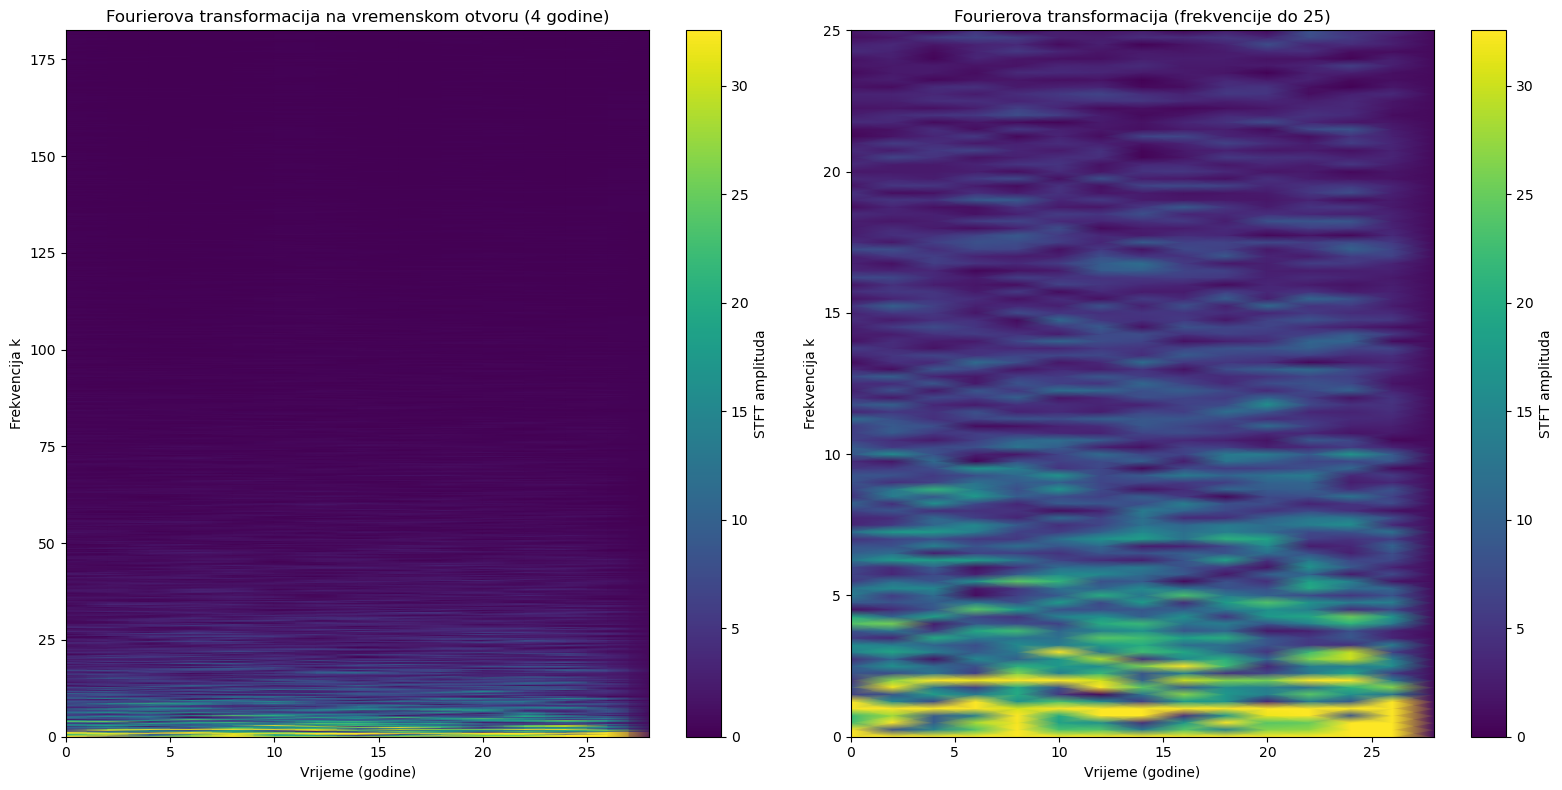

In [49]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

# Postavi grafiku
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fs = 365  # uzorkovanje 365 puta godišnje, tj gledamo koliko ima mjerenja unutar 1 godine, zapravo predstavlja frekvenciju uzrokovanja, 365 puta godisnje, period bi bio 1/365
T = 4  # Širina prozora 4 godine
window = 'boxcar'  # Pravokutni prozor (boxcar prozor)
nperseg = T * fs  # Broj uzoraka po segmentu je duljina prozora (4 godine)

# Izračunaj STFT, short time fourierovu transformaciju
f, t, Zxx = signal.stft(kobas_iz_matlaba, fs=fs, window=window, nperseg=nperseg)
# f - niz frekvencija koje se analiziraju
# t - niz vremesnkih trenutaka kada je prozor STFT primijenjen, ti trenuci odgovaraju različitim segmentima signala koji se analizira
# Zxx - 2D polje: stupac predsatvlja razlicite vremenske segmente (dane u polju t), redak predstavlja različite frekvencije (koje su dane u polju f)
#     - vrijednosti predstavljaju Kompleksne frekvencisjki koeficijent X(t,f) koji sadrži informaciju o amplitudi i fazi svake frekvencije u svakom vremenskom segmentu.

# Prvi graf - puni raspon frekvencija
mappable1 = ax1.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx).max()/10, shading='gouraud')
fig.colorbar(mappable1, ax=ax1, label='STFT amplituda')
ax1.set_title('Fourierova transformacija na vremenskom otvoru (4 godine)')
ax1.set_ylabel('Frekvencija k')
ax1.set_xlabel('Vrijeme (godine)')

# Drugi graf - frekvencije ograničene do 25
f_limit = f[f <= 25]  # Ograniči frekvencije do 25
mappable2 = ax2.pcolormesh(t, f_limit, np.abs(Zxx[:len(f_limit), :]), vmin=0, vmax=np.abs(Zxx).max()/10, shading='gouraud')
fig.colorbar(mappable2, ax=ax2, label='STFT amplituda')
ax2.set_title('Fourierova transformacija (frekvencije do 25)')
ax2.set_ylabel('Frekvencija k')
ax2.set_xlabel('Vrijeme (godine)')

# Prikaz grafova
plt.tight_layout()
plt.show()

ODGOVOR: Povećao sam širinu prozora na 4 godine, što je omogućilo bolju frekvencijsku rezoluciju no s time mi se smanjila vremenska rezolucija

**8.**	Ispišite sve obitelji kontinuiranih valića koje se nalaze u PyWavelets biblioteci. Na istoj slici, koristeći subplot naredbu, nacrtajte dvije valićne funkcije po izboru. U naslovu svake slike napišite o kojim valićima se radi.

Obitelji valiča: ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


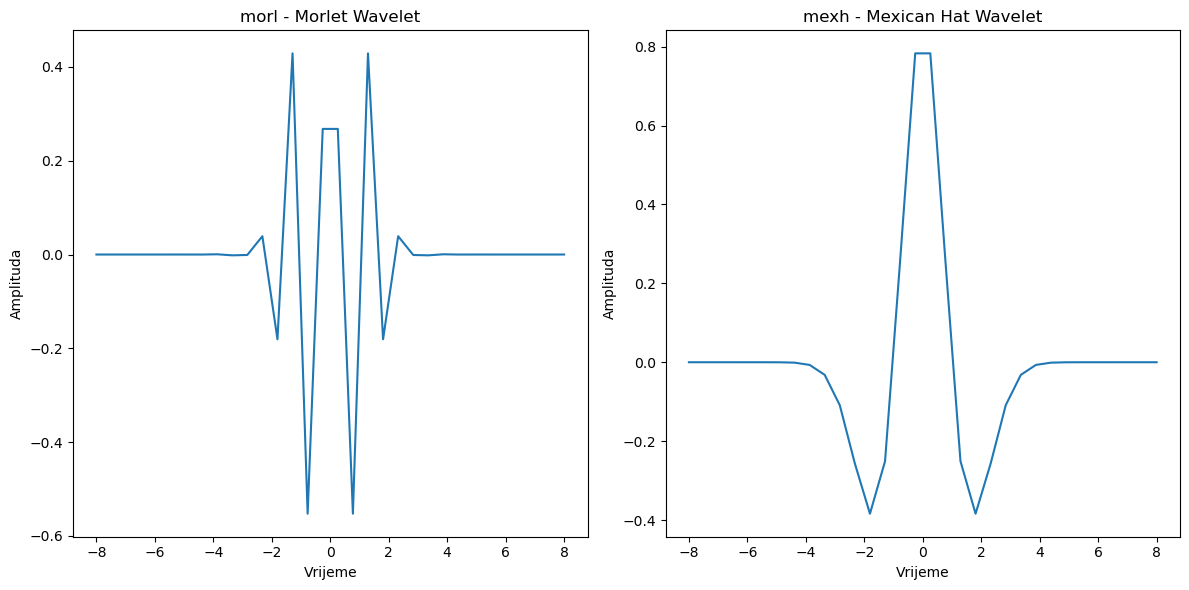

In [51]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

# Ispis svih obitelji valiča iz PyWavelets biblioteke
wavelet_families = pywt.families()
print("Obitelji valiča:", wavelet_families)

# Odabir dviju kontinuiranih valičnih funkcija za crtanje
wavelet1 = 'morl'  # Morlet valić
wavelet2 = 'mexh'  # Mexican Hat valić

# Generiraj podatke za te valićne funkcije (prilagodba za povrat dva podatka)
psi1, x1 = pywt.ContinuousWavelet(wavelet1).wavefun(level=5)
psi2, x2 = pywt.ContinuousWavelet(wavelet2).wavefun(level=5)

# Postavi subplot za crtanje dviju valičnih funkcija
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Prvi graf - Morlet valić
ax1.plot(x1, psi1)
ax1.set_title(f'{wavelet1} - Morlet Wavelet')
ax1.set_xlabel('Vrijeme')
ax1.set_ylabel('Amplituda')

# Drugi graf - Mexican Hat valić
ax2.plot(x2, psi2)
ax2.set_title(f'{wavelet2} - Mexican Hat Wavelet')
ax2.set_xlabel('Vrijeme')
ax2.set_ylabel('Amplituda')

# Prikaz grafova
plt.tight_layout()
plt.show()

**9.**	Koristeći Morlet valić, odredite kontinuiranu valićnu transformaciju zadanog vodostaja. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

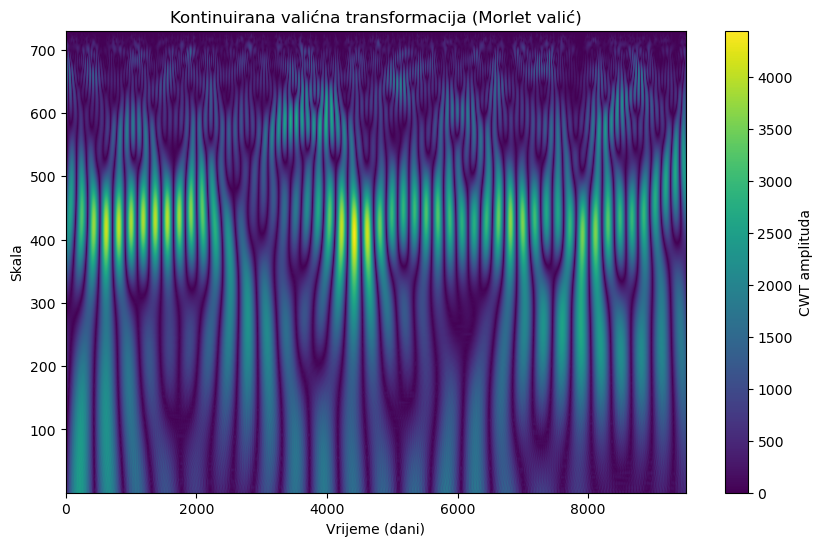

In [55]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

# Odabir Morlet valićne funkcije
valic = 'morl'

# Generiranje skala u rasponu od 0.1 do 2*T s korakom step
T = 365  # Vremenski interval 
step = 0.05  # Manji korak za bolju rezoluciju
skala = np.arange(0.1, 2*T, step)


# Računanje kontinuirane valićne transformacije (CWT) signala
coef, freqs = pywt.cwt(kobas_iz_matlaba, skala, valic)

# Prikaz rezultata (apsolutne vrijednosti koeficijenata)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coef), extent=[0, len(kobas_iz_matlaba), skala.min(), skala.max()], aspect='auto', cmap='viridis')
plt.colorbar(label='CWT amplituda')
plt.title('Kontinuirana valićna transformacija (Morlet valić)')
plt.ylabel('Skala')
plt.xlabel('Vrijeme (dani)')
plt.show()

# Dodaj objašnjenje o interpretaciji y-osi (skale):
# Y-osa prikazuje skale, koje su inverzno proporcionalne frekvencijama.
# Manje skale (pri dnu grafa) odgovaraju višim frekvencijama, tj. bržim promjenama signala.
# Veće skale (pri vrhu grafa) odgovaraju nižim frekvencijama, tj. sporijim promjenama signala.
# Primjerice:
# - Skala 100 može odgovarati višoj frekvenciji, npr. događaji koji se ponavljaju svakih nekoliko dana.
# - Skala 500 može odgovarati nižoj frekvenciji, npr. događaji koji se ponavljaju svakih nekoliko mjeseci.
# Interpretiraj sliku tako da promatraš gdje su najtoplije boje (žuta), jer to označava dominantne frekvencijske komponente signala.
# Toplije boje u višim skalama (niže frekvencije) označavaju dominantne sporije promjene u signalu, npr. sezonske promjene u vodostaju.

ODGOVOR: 

Frekvencije vidljive u vodostaju:

Srednje skale (iznad skale 300) odgovaraju srednjim frekvencijama u signalu. Te frekvencije mogu predstavljati periodične promjene poput sezonskih ili polusezonskih oscilacija.
Skale između 400 i 500 pokazuju izražene frekvencijske komponente, što može ukazivati na promjene koje se događaju u srednjem vremenskom rasponu.
Godine kada se te frekvencije javljaju:

Najizraženije frekvencijske komponente pojavljuju se u vremenskim periodima između:
1500. i 4500. dana,
6000. i 9000. dana.
U tim vremenskim periodima vidimo dominantne promjene u signalu, koje se manifestiraju kao visoke amplitude u frekvencijama odgovarajućim srednjim skalama.

**10.**	Odgovorite: objasnite razliku u dobivenim rezultatima STFT i CWT.

ODGOVOR: 

STFT koristi fiksnu vremensko-frekvencijsku rezoluciju, što znači da isti prozor analizira cijeli signal. Kao rezultat, daje precizniju vremensku lokalizaciju na višim frekvencijama, ali slabiju preciznost na nižim frekvencijama. Na slici STFT-a to se vidi kao manje jasno izražene promjene u vremenu i frekvenciji.

CWT koristi promjenjivu rezoluciju, što omogućuje bolju analizu promjena u frekvencijama kroz vrijeme. Na slici CWT-a jasno su vidljive frekvencijske komponente na različitim skalama, s preciznijom lokalizacijom promjena, osobito u nižim frekvencijama. CWT je računalno zahtjevniji, ali daje bogatije i detaljnije rezultate.